# SYSTEMY ROZMYTE 1

In [1]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\user\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg (0.4.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Wynik dla:  Warszawa
50.0 % przyjazne
Wynik dla:  Kraków
50.0 % przyjazne
Wynik dla:  Gdańsk
83.0 % przyjazne
Wynik dla:  Wrocław
65.0 % przyjazne
Wynik dla:  Katowice
42.0 % przyjazne
Wynik dla:  Poznań
57.0 % przyjazne
Wynik dla:  Gliwice
42.0 % przyjazne


C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\scikit_fuzzy-0.4.2-py3.7.egg\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backe

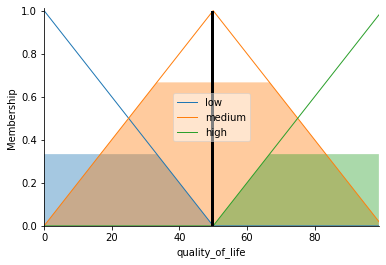

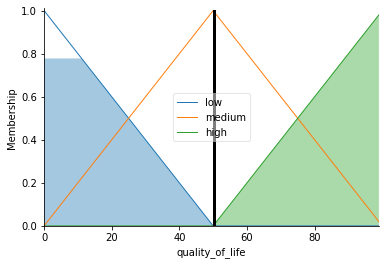

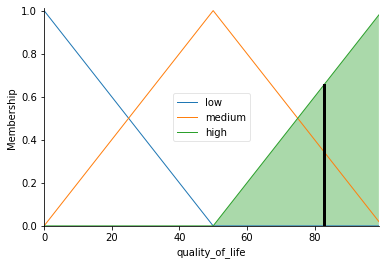

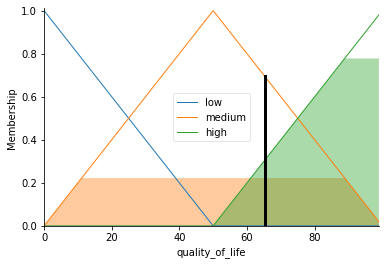

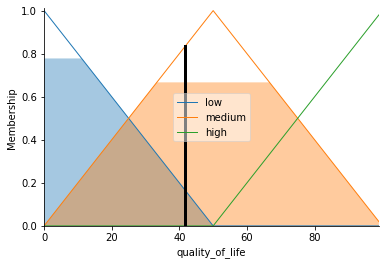

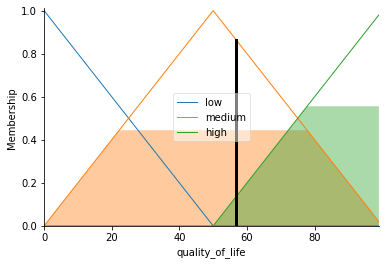

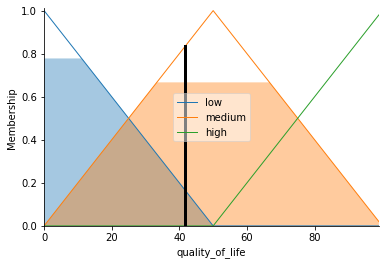

In [3]:
#wykorzsytamy biblioteke skfuzzy
sunny = ctrl.Antecedent(np.arange(0, 1, 0.1), 'sunny')
air_quality = ctrl.Antecedent(np.arange(0, 1, 0.1), 'air_quality')
quality_of_life = ctrl.Consequent(np.arange(0, 100, 1), 'quality_of_life')

#ustawienie slonce,powietrze
sunny.automf(3)
air_quality.automf(3)


quality_of_life['low'] = fuzz.trimf(quality_of_life.universe, [0, 0,50])
quality_of_life['medium'] = fuzz.trimf(quality_of_life.universe, [0, 50,100])
quality_of_life['high'] = fuzz.trimf(quality_of_life.universe, [50, 100, 100])

#ustawienie danych podanych w tresci zadania
rule1 = ctrl.Rule(sunny['poor'] | air_quality['poor'], quality_of_life['low'])
rule2 = ctrl.Rule(sunny['average'], quality_of_life['medium'])
rule3 = ctrl.Rule(sunny['good'] | air_quality['good'], quality_of_life['high'])

#zlozenie wszystkich waruunkow
quality_of_life_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


#dane z zadania co do miast
qol = ctrl.ControlSystemSimulation(quality_of_life_ctrl)
naslonecznienie={"Warszawa": 0.6, "Kraków": 1.0, "Gdańsk": 0.9, "Wrocław": 0.8, "Katowice": 0.3, "Poznań": 0.7, "Gliwice": 0.3}
powietrze={"Warszawa": 0.3, "Kraków": 0.1, "Gdańsk": 0.9, "Wrocław": 0.7, "Katowice": 0.1, "Poznań": 0.6, "Gliwice": 0.1}
#petla wyswietli kazde z mozliwosci
for x in zip(naslonecznienie.keys(),naslonecznienie.values(),powietrze.values()):
    qol.input['sunny']=x[1]
    qol.input['air_quality']=x[2]
    qol.compute()
    print("Wynik dla: ",x[0])
    print(np.round(qol.output['quality_of_life']),"% przyjazne")
    
    quality_of_life.view(sim=qol)
    quality_of_life.view

